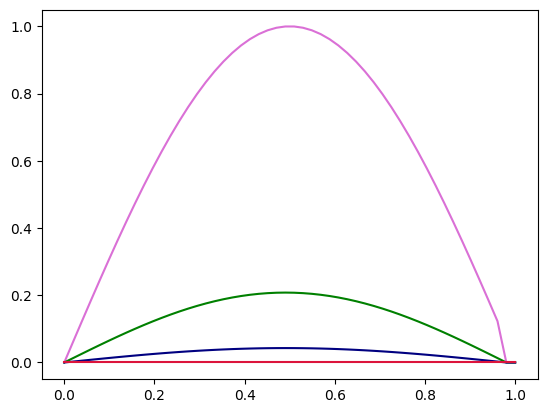

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
  return np.sin(np.pi*x)

N = 50
hx = 1.0/(N+1)
ht = 0.4 * hx * hx
sigma = ht / hx / hx
x = np.linspace(0,1,N+2)
To = np.zeros(N+2)
Tn = np.zeros(N+2)

Temp = 10
Niter = int(Temp/ht)

T = np.zeros((Niter+1, N+2))

def T0(x):
  return np.sin(np.pi*x)

To[0] = 0.0
To[-1] = 0.0
for i in range(1,N):
  To[i] = T0(x[i])

T[0,:] = To.copy()

for n in range(Niter):
  Tn[0] = 0.0
  Tn[-1] = 0.0
  for i in range(1,N):
    Tn[i] = sigma * To[i-1] + (1.0 - 2*sigma)*To[i] + sigma*To[i+1]
  T[n+1,:] = Tn.copy()
  To = Tn.copy()

plt.plot(x,T[0], color='orchid')
plt.plot(x,T[1000], color='green')
plt.plot(x,T[2000], color='navy')
plt.plot(x,T[-1], color='crimson')

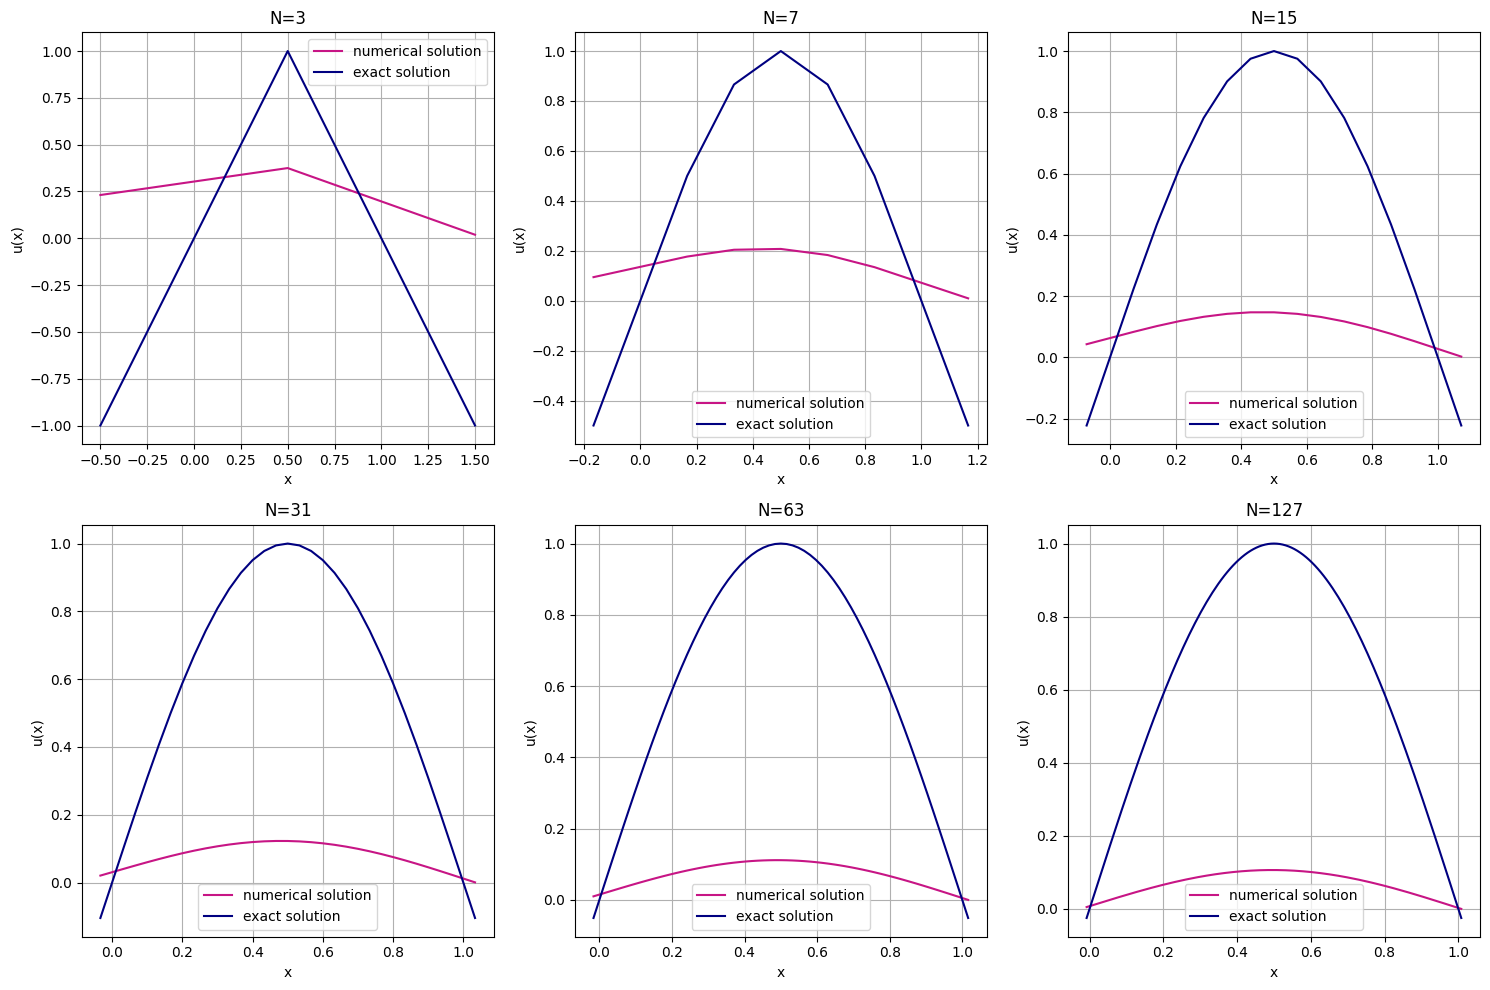

In [2]:
#exemplo 1

import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sin(np.pi * x)

N_values = [3, 7, 15, 31, 63, 127]
plt.figure(figsize=(15, 10))

u_values = []

for i in range(len(N_values)):
    N = N_values[i]
    h = 1 / (N - 1)
    x = np.linspace(0 - h, 1 + h, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros(N + 2)

    for n in range(N + 2):
        if n == 0:
            #left bnd
            A[n, 0] = 2.0
            A[n, 1] = -1.0
            b[n] = h / np.pi
        elif n == N + 1:
            #right bnd
            A[n, N] = -1.0
            A[n, N + 1] = 2.0
            b[n] = -h / np.pi
        else:
            #main equation
            A[n, n - 1] = -1.0
            A[n, n] = 2.0
            A[n, n + 1] = -1.0
            b[n] = h * h * f(x[n])

    u = np.linalg.solve(A, b)
    u_values.append(u)

    plt.subplot(2, 3, i + 1)
    plt.plot(x, u, label='numerical solution', color='mediumvioletred')
    plt.plot(x, f(x), label='exact solution', color='navy')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title(f'N={N}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
def dif(u_values):
    x_target = 0.5
    exact_value = 1.0
    N_values = [3, 7, 15, 31, 63, 127]

    for i, u in enumerate(u_values):
        N = N_values[i]
        x = np.linspace(0, 1, N + 2)
        dx = np.argmin(np.abs(x - x_target))
        u_0_5 = u[dx]
        d = abs(exact_value - u_0_5)

        print(f'difference for N = {N}: {d}')

In [4]:
dif(u_values)

difference for N = 3: 0.625
difference for N = 7: 0.7926638440239513
difference for N = 15: 0.8529707090040176
difference for N = 31: 0.8773849099870337
difference for N = 63: 0.8883912709840095
difference for N = 127: 0.8936212910582739


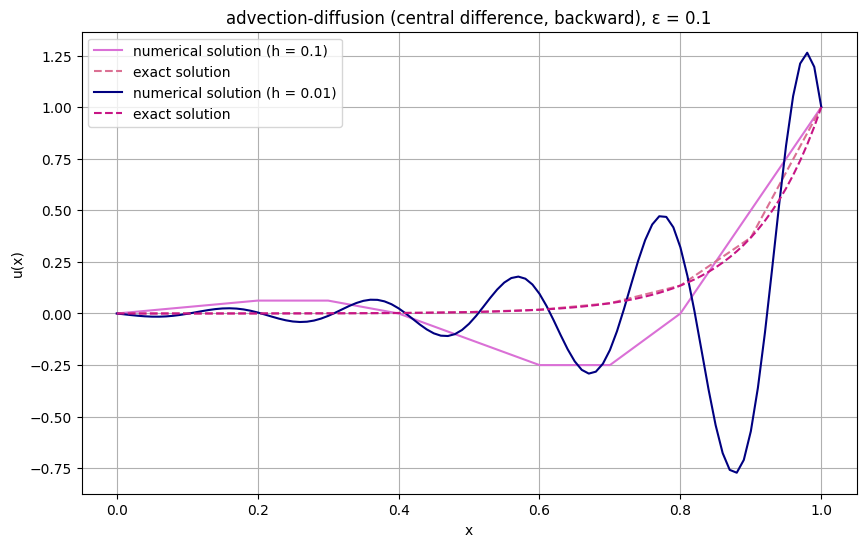

In [8]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.1
#epsilon = 0.01
h_values = [0.1, 0.01]

def solve_advection_diffusion_backward(epsilon, h):
    N = int(1 / h)
    x = np.linspace(0, 1, N+1)
    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)

    A[0, 0] = 1
    A[N, N] = 1
    b[N] = 1

    for i in range(1, N):
        A[i, i-1] = -epsilon / h**2 - 1 / h
        A[i, i] = 2 * epsilon / h**2
        A[i, i+1] = -epsilon / h**2

    try:
        u = np.linalg.solve(A, b)
        #u = np.dot(np.linalg.pinv(A), b)
    except np.linalg.LinAlgError as e:
        print("error:", e)
        return x, None

    return x, u

def exact_solution(x, epsilon):
    return (np.exp(x / epsilon) - 1) / (np.exp(1 / epsilon) - 1)

plt.figure(figsize=(10, 6))

ncolors = ['orchid', 'navy']
ecolors = ['palevioletred', 'mediumvioletred']

for h, ncolor, ecolor in zip(h_values, ncolors, ecolors):
    x, u_numeric = solve_advection_diffusion_backward(epsilon, h)
    if u_numeric is not None:
        u_exact = exact_solution(x, epsilon)
        plt.plot(x, u_numeric, color=ncolor, label=f'numerical solution (h = {h})')
        plt.plot(x, u_exact, '--', color=ecolor, label='exact solution')

plt.title(f'advection-diffusion (central difference, backward), ε = {epsilon}')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

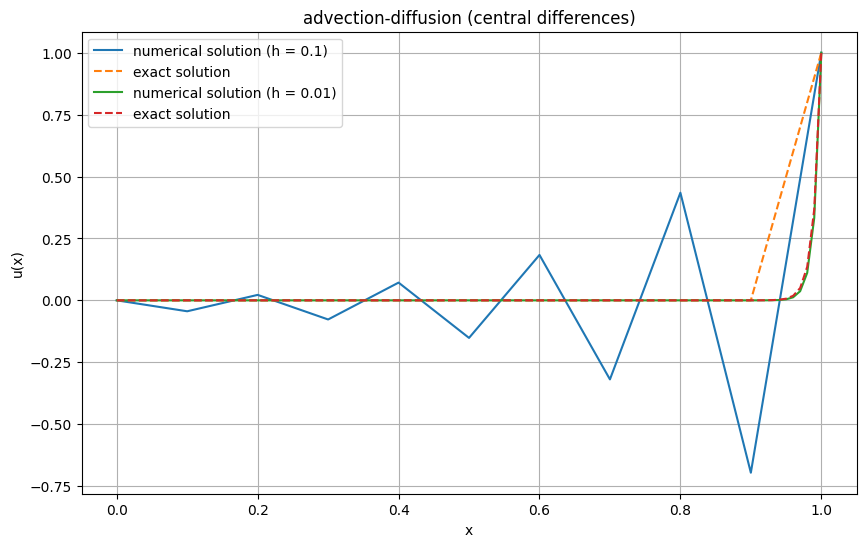

In [9]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 0.01
h_values = [0.1, 0.01]

def solve_advection_diffusion(epsilon, h):
    N = int(1 / h)
    x = np.linspace(0, 1, N+1)
    u = np.zeros(N+1)

    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)

    A[0, 0] = 1  # u(0) = 0
    A[N, N] = 1  # u(1) = 1
    b[N] = 1

    for i in range(1, N):
        A[i, i-1] = -epsilon / h**2 - 1 / (2 * h)
        A[i, i] = 2 * epsilon / h**2
        A[i, i+1] = -epsilon / h**2 + 1 / (2 * h)

    u = np.linalg.solve(A, b)

    return x, u

def exact_solution(x, epsilon):
    return (np.exp(x / epsilon) - 1) / (np.exp(1 / epsilon) - 1)

plt.figure(figsize=(10, 6))

for h in h_values:
    x, u_numeric = solve_advection_diffusion(epsilon, h)
    u_exact = exact_solution(x, epsilon)

    plt.plot(x, u_numeric, label=f'numerical solution (h = {h})')
    plt.plot(x, u_exact, '--', label='exact solution')

plt.title('advection-diffusion (central differences)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()